##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE234933**

files previously downloaded:
GSE234933_MGH_HNSCC_cell_annotation.txt.gz
GSE234933_MGH_HNSCC_gex_raw_counts.tar.gz
GSE234933_MGH_HNSCC_sample_annotation.txt.gz

then unzipped the tar file above which gave rds files for each sample: 
* HN1_gex_raw_counts.rds    --> Primary
* HN2_gex_raw_counts.rds    --> mets
* HN7_gex_raw_counts.rds    --> Primary
* HN8_gex_raw_counts.rds    --> mets
* HN13_gex_raw_counts.rds   --> mets
* HN14_gex_raw_counts.rds   --> mets
* HN17_gex_raw_counts.rds   --> primary
* HN20_gex_raw_counts.rds   --> recurrence
* HN21_gex_raw_counts.rds   --> mets
* HN22_gex_raw_counts.rds   --> recurrence
* HN23_gex_raw_counts.rds   --> recurrence
* HN25_gex_raw_counts.rds   --> mets
* HN26_gex_raw_counts.rds   --> recurrence
* HN27_gex_raw_counts.rds   --> mets
* HN28_gex_raw_counts.rds   --> recurrence
* HN29_gex_raw_counts.rds   --> recurrence
* HN30_gex_raw_counts.rds   --> primary
* HN31TS_gex_raw_counts.rds  --> primary
* HN32T_gex_raw_counts.rds  --> recurrence
* HN33_gex_raw_counts.rds   --> mets
* HN34_gex_raw_counts.rds   --> mets   
* HN35_gex_raw_counts.rds   --> recurrence
* HN37_gex_raw_counts.rds   --> recurrence
* HN38_gex_raw_counts.rds   --> recurrence
* HN39_gex_raw_counts.rds   --> primary
* HN40-3-05_gex_raw_counts.rds   --> primary
* HN42_gex_raw_counts.rds  --> mets
* HN43_gex_raw_counts.rds  --> recurrence
* HN45_gex_raw_counts.rds  --> recurrence
* HN46_gex_raw_counts.rds  --> primary
* HN49_gex_raw_counts.rds  --> primary
* HN50_gex_raw_counts.rds  --> primary           
* HN52_gex_raw_counts.rds  --> primary
* HN55_gex_raw_counts.rds  --> recurrence
* HN57-1_gex_raw_counts.rds  --> recurrence
* HN58_gex_raw_counts.rds  --> primary
* HN59_gex_raw_counts.rds  --> primary
* HN60_gex_raw_counts.rds  --> primary
* HN61_gex_raw_counts.rds  --> mets
* HN63_gex_raw_counts.rds  --> primary
* HN64_gex_raw_counts.rds  --> primary
* HN66_gex_raw_counts.rds  --> recurrence
* HN67_gex_raw_counts.rds  --> primary       
* HN68_gex_raw_counts.rds  --> primary
* HN70_gex_raw_counts.rds  --> primary
* HN71_gex_raw_counts.rds  --> mets
* HN72_gex_raw_counts.rds  --> primary
* HN73_gex_raw_counts.rds  --> recurrence
* HN74_gex_raw_counts.rds  --> primary
* HN75_gex_raw_counts.rds  --> primary
* HN76_gex_raw_counts.rds  --> primary
* HN77_gex_raw_counts.rds  --> primary
    
##### data is from  HNSCC, 52 samples contain 24 primary, 16 local recurrences and 12 distant mets. 15 of the samples were HPV positive (data info from GEO listing)


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE234933')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE234933"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [6]:
#load all datasets
HN1.data <- readRDS("HN1_gex_raw_counts.rds")
HN2.data <- readRDS("HN2_gex_raw_counts.rds")
HN7.data <- readRDS("HN7_gex_raw_counts.rds")
HN8.data <- readRDS("HN8_gex_raw_counts.rds")
HN13.data <- readRDS("HN13_gex_raw_counts.rds")
HN14.data <- readRDS("HN14_gex_raw_counts.rds")
HN17.data <- readRDS("HN17_gex_raw_counts.rds")
HN20.data <- readRDS("HN20_gex_raw_counts.rds")
HN21.data <- readRDS("HN21_gex_raw_counts.rds")
HN22.data <- readRDS("HN22_gex_raw_counts.rds")
HN23.data <- readRDS("HN23_gex_raw_counts.rds")
HN25.data <- readRDS("HN25_gex_raw_counts.rds")
HN26.data <- readRDS("HN26_gex_raw_counts.rds")
HN27.data <- readRDS("HN27_gex_raw_counts.rds")
HN28.data <- readRDS("HN28_gex_raw_counts.rds")
HN29.data <- readRDS("HN29_gex_raw_counts.rds")
HN30.data <- readRDS("HN30_gex_raw_counts.rds")
HN31.data <- readRDS("HN31TS_gex_raw_counts.rds")
HN32.data <- readRDS("HN32T_gex_raw_counts.rds")
HN33.data <- readRDS("HN33_gex_raw_counts.rds")
HN34.data <- readRDS("HN34_gex_raw_counts.rds")
HN35.data <- readRDS("HN35_gex_raw_counts.rds")
HN37.data <- readRDS("HN37_gex_raw_counts.rds")
HN38.data <- readRDS("HN38_gex_raw_counts.rds")
HN39.data <- readRDS("HN39_gex_raw_counts.rds")
HN40.data <- readRDS("HN40-3-05_gex_raw_counts.rds")
HN42.data <- readRDS("HN42_gex_raw_counts.rds")
HN43.data <- readRDS("HN43_gex_raw_counts.rds")
HN45.data <- readRDS("HN45_gex_raw_counts.rds")
HN46.data <- readRDS("HN46_gex_raw_counts.rds")
HN49.data <- readRDS("HN49_gex_raw_counts.rds")
HN50.data <- readRDS("HN50_gex_raw_counts.rds")
HN52.data <- readRDS("HN52_gex_raw_counts.rds")
HN55.data <- readRDS("HN55_gex_raw_counts.rds")
HN57.data <- readRDS("HN57-1_gex_raw_counts.rds")
HN58.data <- readRDS("HN58_gex_raw_counts.rds")
HN59.data <- readRDS("HN59_gex_raw_counts.rds")
HN60.data <- readRDS("HN60_gex_raw_counts.rds")
HN61.data <- readRDS("HN61_gex_raw_counts.rds")
HN63.data <- readRDS("HN63_gex_raw_counts.rds")
HN64.data <- readRDS("HN64_gex_raw_counts.rds")
HN66.data <- readRDS("HN66_gex_raw_counts.rds")
HN67.data <- readRDS("HN67_gex_raw_counts.rds")
HN68.data <- readRDS("HN68_gex_raw_counts.rds")
HN70.data <- readRDS("HN70_gex_raw_counts.rds")
HN71.data <- readRDS("HN71_gex_raw_counts.rds")
HN72.data <- readRDS("HN72_gex_raw_counts.rds")
HN73.data <- readRDS("HN73_gex_raw_counts.rds")
HN74.data <- readRDS("HN74_gex_raw_counts.rds")
HN75.data <- readRDS("HN75_gex_raw_counts.rds")
HN76.data <- readRDS("HN76_gex_raw_counts.rds")
HN77.data <- readRDS("HN77_gex_raw_counts.rds")

In [7]:
head(colnames(HN1.data))
head(colnames(HN70.data))


[1] "HN1_AAACCTGAGAACAATC-1" "HN1_AAACCTGAGAACTCGG-1" "HN1_AAACCTGAGAACTGTA-1"
[4] "HN1_AAACCTGAGAAGAAGC-1" "HN1_AAACCTGAGAAGCCCA-1" "HN1_AAACCTGAGAAGGTGA-1"

[1] "HN70_AAACCTGAGAAACCAT-1" "HN70_AAACCTGAGAAACGAG-1"
[3] "HN70_AAACCTGAGAAAGTGG-1" "HN70_AAACCTGAGAAGATTC-1"
[5] "HN70_AAACCTGAGAAGCCCA-1" "HN70_AAACCTGAGAAGGACA-1"

In [8]:
#Add dataset info to colnames
colnames(HN1.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN1.data))
colnames(HN2.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN2.data))
colnames(HN7.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN7.data))
colnames(HN8.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN8.data))
colnames(HN13.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN13.data))
colnames(HN14.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN14.data))
colnames(HN17.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN17.data))
colnames(HN20.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN20.data))
colnames(HN21.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN21.data))
colnames(HN22.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN22.data))
colnames(HN23.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN23.data))
colnames(HN25.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN25.data))
colnames(HN26.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN26.data))
colnames(HN27.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN27.data))
colnames(HN28.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN28.data))
colnames(HN29.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN29.data))
colnames(HN30.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN30.data))
colnames(HN31.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN31.data))
colnames(HN32.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN32.data))
colnames(HN33.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN33.data))
colnames(HN34.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN34.data))
colnames(HN35.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN35.data))
colnames(HN37.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN37.data))
colnames(HN38.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN38.data))
colnames(HN39.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN39.data))
colnames(HN40.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN40.data))
colnames(HN42.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN42.data))
colnames(HN43.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN43.data))
colnames(HN45.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN45.data))
colnames(HN46.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN46.data))
colnames(HN49.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN49.data))
colnames(HN50.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN50.data))
colnames(HN52.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN52.data))
colnames(HN55.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN55.data))
colnames(HN57.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN57.data))
colnames(HN58.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN58.data))
colnames(HN59.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN59.data))
colnames(HN60.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN60.data))
colnames(HN61.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN61.data))
colnames(HN63.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN63.data))
colnames(HN64.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN64.data))
colnames(HN66.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN66.data))
colnames(HN67.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN67.data))
colnames(HN68.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN68.data))
colnames(HN70.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN70.data))
colnames(HN71.data) <- paste0("GSE234933_HNSCC_mets_", colnames(HN71.data))
colnames(HN72.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN72.data))
colnames(HN73.data) <- paste0("GSE234933_HNSCC_rec_", colnames(HN73.data))
colnames(HN74.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN74.data))
colnames(HN75.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN75.data))
colnames(HN76.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN76.data))
colnames(HN77.data) <- paste0("GSE234933_HNSCC_tu_", colnames(HN77.data))


In [9]:
head(colnames(HN38.data))
head(colnames(HN76.data))

[1] "GSE234933_HNSCC_rec_HN38_AAACCTGAGAAACCAT-1"
[2] "GSE234933_HNSCC_rec_HN38_AAACCTGAGAAACGCC-1"
[3] "GSE234933_HNSCC_rec_HN38_AAACCTGAGAACAATC-1"
[4] "GSE234933_HNSCC_rec_HN38_AAACCTGAGAATCTCC-1"
[5] "GSE234933_HNSCC_rec_HN38_AAACCTGAGAATGTTG-1"
[6] "GSE234933_HNSCC_rec_HN38_AAACCTGAGACTCGGA-1"

[1] "GSE234933_HNSCC_tu_HN76_AAACCTGAGAAACCAT-1"
[2] "GSE234933_HNSCC_tu_HN76_AAACCTGAGAAACCGC-1"
[3] "GSE234933_HNSCC_tu_HN76_AAACCTGAGAAACGCC-1"
[4] "GSE234933_HNSCC_tu_HN76_AAACCTGAGAAAGTGG-1"
[5] "GSE234933_HNSCC_tu_HN76_AAACCTGAGAACAACT-1"
[6] "GSE234933_HNSCC_tu_HN76_AAACCTGAGAACTCGG-1"

In [10]:
#create seperate seurat object for each sample
HN1 <- CreateSeuratObject(counts = HN1.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN1@meta.data$sample_type <- "primary tumour"
HN1@meta.data$cancer_type <- "HNSCC"
HN1@meta.data$patient_id <- "HN1"
HN1@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN1"

In [11]:
#create seperate seurat object for each sample
HN2 <- CreateSeuratObject(counts = HN2.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN2@meta.data$sample_type <- "metastasis"
HN2@meta.data$cancer_type <- "HNSCC"
HN2@meta.data$patient_id <- "HN2"
HN2@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN2"

In [12]:
#create seperate seurat object for each sample
HN7 <- CreateSeuratObject(counts = HN7.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN7@meta.data$sample_type <- "primary tumour"
HN7@meta.data$cancer_type <- "HNSCC"
HN7@meta.data$patient_id <- "HN7"
HN7@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN7"

In [13]:
#create seperate seurat object for each sample
HN8 <- CreateSeuratObject(counts = HN8.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN8@meta.data$sample_type <- "metastasis"
HN8@meta.data$cancer_type <- "HNSCC"
HN8@meta.data$patient_id <- "HN8"
HN8@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN8"

In [14]:
#create seperate seurat object for each sample
HN13 <- CreateSeuratObject(counts = HN13.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN13@meta.data$sample_type <- "metastasis"
HN13@meta.data$cancer_type <- "HNSCC"
HN13@meta.data$patient_id <- "HN13"
HN13@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN13"

In [15]:
#create seperate seurat object for each sample
HN14 <- CreateSeuratObject(counts = HN14.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN14@meta.data$sample_type <- "metastasis"
HN14@meta.data$cancer_type <- "HNSCC"
HN14@meta.data$patient_id <- "HN14"
HN14@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN14"

In [16]:
#create seperate seurat object for each sample
HN17 <- CreateSeuratObject(counts = HN17.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN17@meta.data$sample_type <- "primary tumour"
HN17@meta.data$cancer_type <- "HNSCC"
HN17@meta.data$patient_id <- "HN17"
HN17@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN17"

In [17]:
#create seperate seurat object for each sample
HN20 <- CreateSeuratObject(counts = HN20.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN20@meta.data$sample_type <- "tumour recurrence"
HN20@meta.data$cancer_type <- "HNSCC"
HN20@meta.data$patient_id <- "HN20"
HN20@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN20"

In [18]:
#create seperate seurat object for each sample
HN21 <- CreateSeuratObject(counts = HN21.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN21@meta.data$sample_type <- "metastasis"
HN21@meta.data$cancer_type <- "HNSCC"
HN21@meta.data$patient_id <- "HN21"
HN21@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN21"

In [19]:
#create seperate seurat object for each sample
HN22 <- CreateSeuratObject(counts = HN22.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN22@meta.data$sample_type <- "tumour recurrence"
HN22@meta.data$cancer_type <- "HNSCC"
HN22@meta.data$patient_id <- "HN22"
HN22@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN22"

In [20]:
#create seperate seurat object for each sample
HN23 <- CreateSeuratObject(counts = HN23.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN23@meta.data$sample_type <- "tumour recurrence"
HN23@meta.data$cancer_type <- "HNSCC"
HN23@meta.data$patient_id <- "HN23"
HN23@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN23"

In [21]:
#create seperate seurat object for each sample
HN25 <- CreateSeuratObject(counts = HN25.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN25@meta.data$sample_type <- "metastasis"
HN25@meta.data$cancer_type <- "HNSCC"
HN25@meta.data$patient_id <- "HN25"
HN25@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN25"

In [22]:
#create seperate seurat object for each sample
HN26 <- CreateSeuratObject(counts = HN26.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN26@meta.data$sample_type <- "tumour recurrence"
HN26@meta.data$cancer_type <- "HNSCC"
HN26@meta.data$patient_id <- "HN26"
HN26@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN26"

In [23]:
#create seperate seurat object for each sample
HN27 <- CreateSeuratObject(counts = HN27.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN27@meta.data$sample_type <- "metastasis"
HN27@meta.data$cancer_type <- "HNSCC"
HN27@meta.data$patient_id <- "HN27"
HN27@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN27"

In [24]:
#create seperate seurat object for each sample
HN28 <- CreateSeuratObject(counts = HN28.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN28@meta.data$sample_type <- "tumour recurrence"
HN28@meta.data$cancer_type <- "HNSCC"
HN28@meta.data$patient_id <- "HN28"
HN28@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN28"

In [25]:
#create seperate seurat object for each sample
HN29 <- CreateSeuratObject(counts = HN29.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN29@meta.data$sample_type <- "tumour recurrence"
HN29@meta.data$cancer_type <- "HNSCC"
HN29@meta.data$patient_id <- "HN29"
HN29@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN29"

In [26]:
#create seperate seurat object for each sample
HN30 <- CreateSeuratObject(counts = HN30.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN30@meta.data$sample_type <- "primary tumour"
HN30@meta.data$cancer_type <- "HNSCC"
HN30@meta.data$patient_id <- "HN30"
HN30@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN30"

In [27]:
#create seperate seurat object for each sample
HN31 <- CreateSeuratObject(counts = HN31.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN31@meta.data$sample_type <- "primary tumour"
HN31@meta.data$cancer_type <- "HNSCC"
HN31@meta.data$patient_id <- "HN31"
HN31@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN31"

In [28]:
#create seperate seurat object for each sample
HN32 <- CreateSeuratObject(counts = HN32.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN32@meta.data$sample_type <- "tumour recurrence"
HN32@meta.data$cancer_type <- "HNSCC"
HN32@meta.data$patient_id <- "HN32"
HN32@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN32"

In [29]:
#create seperate seurat object for each sample
HN33 <- CreateSeuratObject(counts = HN33.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN33@meta.data$sample_type <- "metastasis"
HN33@meta.data$cancer_type <- "HNSCC"
HN33@meta.data$patient_id <- "HN33"
HN33@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN33"

In [30]:
#create seperate seurat object for each sample
HN34 <- CreateSeuratObject(counts = HN34.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN34@meta.data$sample_type <- "metastasis"
HN34@meta.data$cancer_type <- "HNSCC"
HN34@meta.data$patient_id <- "HN34"
HN34@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN34"

In [31]:
#create seperate seurat object for each sample
HN35 <- CreateSeuratObject(counts = HN35.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN35@meta.data$sample_type <- "tumour recurrence"
HN35@meta.data$cancer_type <- "HNSCC"
HN35@meta.data$patient_id <- "HN35"
HN35@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN35"

In [32]:
#create seperate seurat object for each sample
HN37 <- CreateSeuratObject(counts = HN37.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN37@meta.data$sample_type <- "tumour recurrence"
HN37@meta.data$cancer_type <- "HNSCC"
HN37@meta.data$patient_id <- "HN37"
HN37@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN37"

In [33]:
#create seperate seurat object for each sample
HN38 <- CreateSeuratObject(counts = HN38.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN38@meta.data$sample_type <- "tumour recurrence"
HN38@meta.data$cancer_type <- "HNSCC"
HN38@meta.data$patient_id <- "HN38"
HN38@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN38"

In [34]:
#create seperate seurat object for each sample
HN39 <- CreateSeuratObject(counts = HN39.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN39@meta.data$sample_type <- "primary tumour"
HN39@meta.data$cancer_type <- "HNSCC"
HN39@meta.data$patient_id <- "HN39"
HN39@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN39"

In [35]:
#create seperate seurat object for each sample
HN40 <- CreateSeuratObject(counts = HN40.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN40@meta.data$sample_type <- "primary tumour"
HN40@meta.data$cancer_type <- "HNSCC"
HN40@meta.data$patient_id <- "HN40"
HN40@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN40"

In [36]:
#create seperate seurat object for each sample
HN42 <- CreateSeuratObject(counts = HN42.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN42@meta.data$sample_type <- "metastasis"
HN42@meta.data$cancer_type <- "HNSCC"
HN42@meta.data$patient_id <- "HN42"
HN42@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN42"

In [37]:
#create seperate seurat object for each sample
HN43 <- CreateSeuratObject(counts = HN43.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN43@meta.data$sample_type <- "tumour recurrence"
HN43@meta.data$cancer_type <- "HNSCC"
HN43@meta.data$patient_id <- "HN43"
HN43@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN43"

In [38]:
#create seperate seurat object for each sample
HN45 <- CreateSeuratObject(counts = HN45.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN45@meta.data$sample_type <- "tumour recurrence"
HN45@meta.data$cancer_type <- "HNSCC"
HN45@meta.data$patient_id <- "HN45"
HN45@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN45"

In [39]:
#create seperate seurat object for each sample
HN46 <- CreateSeuratObject(counts = HN46.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN46@meta.data$sample_type <- "primary tumour"
HN46@meta.data$cancer_type <- "HNSCC"
HN46@meta.data$patient_id <- "HN46"
HN46@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN46"

In [40]:
#create seperate seurat object for each sample
HN49 <- CreateSeuratObject(counts = HN49.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN49@meta.data$sample_type <- "primary tumour"
HN49@meta.data$cancer_type <- "HNSCC"
HN49@meta.data$patient_id <- "HN49"
HN49@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN49"

In [41]:
#create seperate seurat object for each sample
HN50 <- CreateSeuratObject(counts = HN50.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN50@meta.data$sample_type <- "primary tumour"
HN50@meta.data$cancer_type <- "HNSCC"
HN50@meta.data$patient_id <- "HN50"
HN50@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN50"

In [42]:
#create seperate seurat object for each sample
HN52 <- CreateSeuratObject(counts = HN52.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN52@meta.data$sample_type <- "primary tumour"
HN52@meta.data$cancer_type <- "HNSCC"
HN52@meta.data$patient_id <- "HN52"
HN52@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN52"

In [43]:
#create seperate seurat object for each sample
HN55 <- CreateSeuratObject(counts = HN55.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN55@meta.data$sample_type <- "tumour recurrence"
HN55@meta.data$cancer_type <- "HNSCC"
HN55@meta.data$patient_id <- "HN55"
HN55@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN55"

In [44]:
#create seperate seurat object for each sample
HN57 <- CreateSeuratObject(counts = HN57.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN57@meta.data$sample_type <- "tumour recurrence"
HN57@meta.data$cancer_type <- "HNSCC"
HN57@meta.data$patient_id <- "HN57"
HN57@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN57"

In [45]:
#create seperate seurat object for each sample
HN58 <- CreateSeuratObject(counts = HN58.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN58@meta.data$sample_type <- "primary tumour"
HN58@meta.data$cancer_type <- "HNSCC"
HN58@meta.data$patient_id <- "HN58"
HN58@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN58"

In [46]:
#create seperate seurat object for each sample
HN59 <- CreateSeuratObject(counts = HN59.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN59@meta.data$sample_type <- "primary tumour"
HN59@meta.data$cancer_type <- "HNSCC"
HN59@meta.data$patient_id <- "HN59"
HN59@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN59"

In [47]:
#create seperate seurat object for each sample
HN60 <- CreateSeuratObject(counts = HN60.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN60@meta.data$sample_type <- "primary tumour"
HN60@meta.data$cancer_type <- "HNSCC"
HN60@meta.data$patient_id <- "HN60"
HN60@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN60"

In [48]:
#create seperate seurat object for each sample
HN61 <- CreateSeuratObject(counts = HN61.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN61@meta.data$sample_type <- "metastasis"
HN61@meta.data$cancer_type <- "HNSCC"
HN61@meta.data$patient_id <- "HN61"
HN61@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN61"

In [49]:
#create seperate seurat object for each sample
HN63 <- CreateSeuratObject(counts = HN63.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN63@meta.data$sample_type <- "primary tumour"
HN63@meta.data$cancer_type <- "HNSCC"
HN63@meta.data$patient_id <- "HN63"
HN63@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN63"

In [50]:
#create seperate seurat object for each sample
HN64 <- CreateSeuratObject(counts = HN64.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN64@meta.data$sample_type <- "primary tumour"
HN64@meta.data$cancer_type <- "HNSCC"
HN64@meta.data$patient_id <- "HN64"
HN64@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN64"

In [51]:
#create seperate seurat object for each sample
HN66 <- CreateSeuratObject(counts = HN66.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN66@meta.data$sample_type <- "tumour recurrence"
HN66@meta.data$cancer_type <- "HNSCC"
HN66@meta.data$patient_id <- "HN66"
HN66@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN66"

In [52]:
#create seperate seurat object for each sample
HN67 <- CreateSeuratObject(counts = HN67.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN67@meta.data$sample_type <- "primary tumour"
HN67@meta.data$cancer_type <- "HNSCC"
HN67@meta.data$patient_id <- "HN67"
HN67@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN67"

In [53]:
#create seperate seurat object for each sample
HN68 <- CreateSeuratObject(counts = HN68.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN68@meta.data$sample_type <- "primary tumour"
HN68@meta.data$cancer_type <- "HNSCC"
HN68@meta.data$patient_id <- "HN68"
HN68@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN68"

In [54]:
#create seperate seurat object for each sample
HN70 <- CreateSeuratObject(counts = HN70.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN70@meta.data$sample_type <- "primary tumour"
HN70@meta.data$cancer_type <- "HNSCC"
HN70@meta.data$patient_id <- "HN70"
HN70@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN70"

In [55]:
#create seperate seurat object for each sample
HN71 <- CreateSeuratObject(counts = HN71.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN71@meta.data$sample_type <- "metastasis"
HN71@meta.data$cancer_type <- "HNSCC"
HN71@meta.data$patient_id <- "HN71"
HN71@meta.data$sample_id <- "GSE234933_HNSCC_mets_HN71"

In [56]:
#create seperate seurat object for each sample
HN72 <- CreateSeuratObject(counts = HN72.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN72@meta.data$sample_type <- "primary tumour"
HN72@meta.data$cancer_type <- "HNSCC"
HN72@meta.data$patient_id <- "HN72"
HN72@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN72"

In [57]:
#create seperate seurat object for each sample
HN73 <- CreateSeuratObject(counts = HN73.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN73@meta.data$sample_type <- "tumour recurrence"
HN73@meta.data$cancer_type <- "HNSCC"
HN73@meta.data$patient_id <- "HN73"
HN73@meta.data$sample_id <- "GSE234933_HNSCC_rec_HN73"

In [58]:
#create seperate seurat object for each sample
HN74 <- CreateSeuratObject(counts = HN74.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN74@meta.data$sample_type <- "primary tumour"
HN74@meta.data$cancer_type <- "HNSCC"
HN74@meta.data$patient_id <- "HN74"
HN74@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN74"

In [59]:
#create seperate seurat object for each sample
HN75 <- CreateSeuratObject(counts = HN75.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN75@meta.data$sample_type <- "primary tumour"
HN75@meta.data$cancer_type <- "HNSCC"
HN75@meta.data$patient_id <- "HN75"
HN75@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN75"

In [60]:
#create seperate seurat object for each sample
HN76 <- CreateSeuratObject(counts = HN76.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN76@meta.data$sample_type <- "primary tumour"
HN76@meta.data$cancer_type <- "HNSCC"
HN76@meta.data$patient_id <- "HN76"
HN76@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN76"

In [61]:
#create seperate seurat object for each sample
HN77 <- CreateSeuratObject(counts = HN77.data, project = "GSE234933", min.features = 200)
#add metadata to sample
HN77@meta.data$sample_type <- "primary tumour"
HN77@meta.data$cancer_type <- "HNSCC"
HN77@meta.data$patient_id <- "HN77"
HN77@meta.data$sample_id <- "GSE234933_HNSCC_tu_HN77"

In [63]:
head(HN59@meta.data) 
head(HN71@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE234933_HNSCC_tu_HN59_AAACCTGAGCAGCCTC-1 GSE234933   3353      1280        
GSE234933_HNSCC_tu_HN59_AAACCTGAGCTACCTA-1 GSE234933   3357      1277        
GSE234933_HNSCC_tu_HN59_AAACCTGAGTAATCCC-1 GSE234933   8868      2950        
GSE234933_HNSCC_tu_HN59_AAACCTGAGTACGACG-1 GSE234933   2215      1105        
GSE234933_HNSCC_tu_HN59_AAACCTGAGTAGCCGA-1 GSE234933  16326      3172        
GSE234933_HNSCC_tu_HN59_AAACCTGAGTGGGCTA-1 GSE234933   1584       231        
                                           sample_type    cancer_type
GSE234933_HNSCC_tu_HN59_AAACCTGAGCAGCCTC-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN59_AAACCTGAGCTACCTA-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN59_AAACCTGAGTAATCCC-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN59_AAACCTGAGTACGACG-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN59_AAACCTGAGTAGCCGA-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN59_AAACCTGAGTGGGCTA-1 primary tumour HNSCC      
                                           patient_id sample_id              
GSE234933_HNSCC_tu_HN59_AAACCTGAGCAGCCTC-1 HN59       GSE234933_HNSCC_tu_HN59
GSE234933_HNSCC_tu_HN59_AAACCTGAGCTACCTA-1 HN59       GSE234933_HNSCC_tu_HN59
GSE234933_HNSCC_tu_HN59_AAACCTGAGTAATCCC-1 HN59       GSE234933_HNSCC_tu_HN59
GSE234933_HNSCC_tu_HN59_AAACCTGAGTACGACG-1 HN59       GSE234933_HNSCC_tu_HN59
GSE234933_HNSCC_tu_HN59_AAACCTGAGTAGCCGA-1 HN59       GSE234933_HNSCC_tu_HN59
GSE234933_HNSCC_tu_HN59_AAACCTGAGTGGGCTA-1 HN59       GSE234933_HNSCC_tu_HN59

orig.ident nCount_RNA nFeature_RNA
GSE234933_HNSCC_mets_HN71_AAACCTGAGACAGAGA-1 GSE234933   1993      1000        
GSE234933_HNSCC_mets_HN71_AAACCTGAGGATGGAA-1 GSE234933   4032      1518        
GSE234933_HNSCC_mets_HN71_AAACCTGAGTTCGATC-1 GSE234933   2902      1196        
GSE234933_HNSCC_mets_HN71_AAACCTGCAACTTGAC-1 GSE234933   2622      1101        
GSE234933_HNSCC_mets_HN71_AAACCTGCACCCTATC-1 GSE234933    353       228        
GSE234933_HNSCC_mets_HN71_AAACCTGCAGCGAACA-1 GSE234933  14417      2781        
                                             sample_type cancer_type patient_id
GSE234933_HNSCC_mets_HN71_AAACCTGAGACAGAGA-1 metastasis  HNSCC       HN71      
GSE234933_HNSCC_mets_HN71_AAACCTGAGGATGGAA-1 metastasis  HNSCC       HN71      
GSE234933_HNSCC_mets_HN71_AAACCTGAGTTCGATC-1 metastasis  HNSCC       HN71      
GSE234933_HNSCC_mets_HN71_AAACCTGCAACTTGAC-1 metastasis  HNSCC       HN71      
GSE234933_HNSCC_mets_HN71_AAACCTGCACCCTATC-1 metastasis  HNSCC       HN71      
GSE234933_HNSCC_mets_HN71_AAACCTGCAGCGAACA-1 metastasis  HNSCC       HN71      
                                             sample_id                
GSE234933_HNSCC_mets_HN71_AAACCTGAGACAGAGA-1 GSE234933_HNSCC_mets_HN71
GSE234933_HNSCC_mets_HN71_AAACCTGAGGATGGAA-1 GSE234933_HNSCC_mets_HN71
GSE234933_HNSCC_mets_HN71_AAACCTGAGTTCGATC-1 GSE234933_HNSCC_mets_HN71
GSE234933_HNSCC_mets_HN71_AAACCTGCAACTTGAC-1 GSE234933_HNSCC_mets_HN71
GSE234933_HNSCC_mets_HN71_AAACCTGCACCCTATC-1 GSE234933_HNSCC_mets_HN71
GSE234933_HNSCC_mets_HN71_AAACCTGCAGCGAACA-1 GSE234933_HNSCC_mets_HN71

In [64]:
#Merge seurat objects
HNSCC <- merge(HN1, y = c(HN2, HN7, HN8, HN13, HN14, HN17, HN20, HN21, HN22, HN23, HN25, HN26, HN27, HN28, HN29, HN30, HN31, HN32, HN33, HN34, HN35, HN37, HN38, HN39, HN40, HN42, HN43, HN45, HN46, HN49, HN50, HN52, HN55, HN57, HN58, HN59, HN60, HN61, HN63, HN64, HN66, HN67, HN68, HN70, HN71, HN72, HN73, HN74, HN75, HN76, HN77), project = "GSE234933")

In [65]:
HNSCC
head(HNSCC@meta.data)
tail(HNSCC@meta.data)

An object of class Seurat 
33514 features across 330385 samples within 1 assay 
Active assay: RNA (33514 features, 0 variable features)
 52 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34, counts.35, counts.36, counts.37, counts.38, counts.39, counts.40, counts.41, counts.42, counts.43, counts.44, counts.45, counts.46, counts.47, counts.48, counts.49, counts.50, counts.51, counts.52

orig.ident nCount_RNA nFeature_RNA
GSE234933_HNSCC_tu_HN1_AAACCTGAGTATTGGA-1 GSE234933   948        574        
GSE234933_HNSCC_tu_HN1_AAACCTGAGTTGCAGG-1 GSE234933  6745        257        
GSE234933_HNSCC_tu_HN1_AAACCTGCAATAGCAA-1 GSE234933   677        320        
GSE234933_HNSCC_tu_HN1_AAACCTGCATTTCACT-1 GSE234933  4541       1130        
GSE234933_HNSCC_tu_HN1_AAACCTGTCGGCGGTT-1 GSE234933   909        444        
GSE234933_HNSCC_tu_HN1_AAACCTGTCTCGTTTA-1 GSE234933   634        353        
                                          sample_type    cancer_type patient_id
GSE234933_HNSCC_tu_HN1_AAACCTGAGTATTGGA-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGAGTTGCAGG-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGCAATAGCAA-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGCATTTCACT-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGTCGGCGGTT-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGTCTCGTTTA-1 primary tumour HNSCC       HN1       
                                          sample_id             
GSE234933_HNSCC_tu_HN1_AAACCTGAGTATTGGA-1 GSE234933_HNSCC_tu_HN1
GSE234933_HNSCC_tu_HN1_AAACCTGAGTTGCAGG-1 GSE234933_HNSCC_tu_HN1
GSE234933_HNSCC_tu_HN1_AAACCTGCAATAGCAA-1 GSE234933_HNSCC_tu_HN1
GSE234933_HNSCC_tu_HN1_AAACCTGCATTTCACT-1 GSE234933_HNSCC_tu_HN1
GSE234933_HNSCC_tu_HN1_AAACCTGTCGGCGGTT-1 GSE234933_HNSCC_tu_HN1
GSE234933_HNSCC_tu_HN1_AAACCTGTCTCGTTTA-1 GSE234933_HNSCC_tu_HN1

orig.ident nCount_RNA nFeature_RNA
GSE234933_HNSCC_tu_HN77_TTTGTCATCCTCGCAT-1 GSE234933  1435        703        
GSE234933_HNSCC_tu_HN77_TTTGTCATCGACAGCC-1 GSE234933  5716       2068        
GSE234933_HNSCC_tu_HN77_TTTGTCATCGCCTGTT-1 GSE234933  1364        575        
GSE234933_HNSCC_tu_HN77_TTTGTCATCTCCAGGG-1 GSE234933  2868       1056        
GSE234933_HNSCC_tu_HN77_TTTGTCATCTGCCAGG-1 GSE234933   537        368        
GSE234933_HNSCC_tu_HN77_TTTGTCATCTGCTGCT-1 GSE234933  3905       1930        
                                           sample_type    cancer_type
GSE234933_HNSCC_tu_HN77_TTTGTCATCCTCGCAT-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN77_TTTGTCATCGACAGCC-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN77_TTTGTCATCGCCTGTT-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN77_TTTGTCATCTCCAGGG-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN77_TTTGTCATCTGCCAGG-1 primary tumour HNSCC      
GSE234933_HNSCC_tu_HN77_TTTGTCATCTGCTGCT-1 primary tumour HNSCC      
                                           patient_id sample_id              
GSE234933_HNSCC_tu_HN77_TTTGTCATCCTCGCAT-1 HN77       GSE234933_HNSCC_tu_HN77
GSE234933_HNSCC_tu_HN77_TTTGTCATCGACAGCC-1 HN77       GSE234933_HNSCC_tu_HN77
GSE234933_HNSCC_tu_HN77_TTTGTCATCGCCTGTT-1 HN77       GSE234933_HNSCC_tu_HN77
GSE234933_HNSCC_tu_HN77_TTTGTCATCTCCAGGG-1 HN77       GSE234933_HNSCC_tu_HN77
GSE234933_HNSCC_tu_HN77_TTTGTCATCTGCCAGG-1 HN77       GSE234933_HNSCC_tu_HN77
GSE234933_HNSCC_tu_HN77_TTTGTCATCTGCTGCT-1 HN77       GSE234933_HNSCC_tu_HN77

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


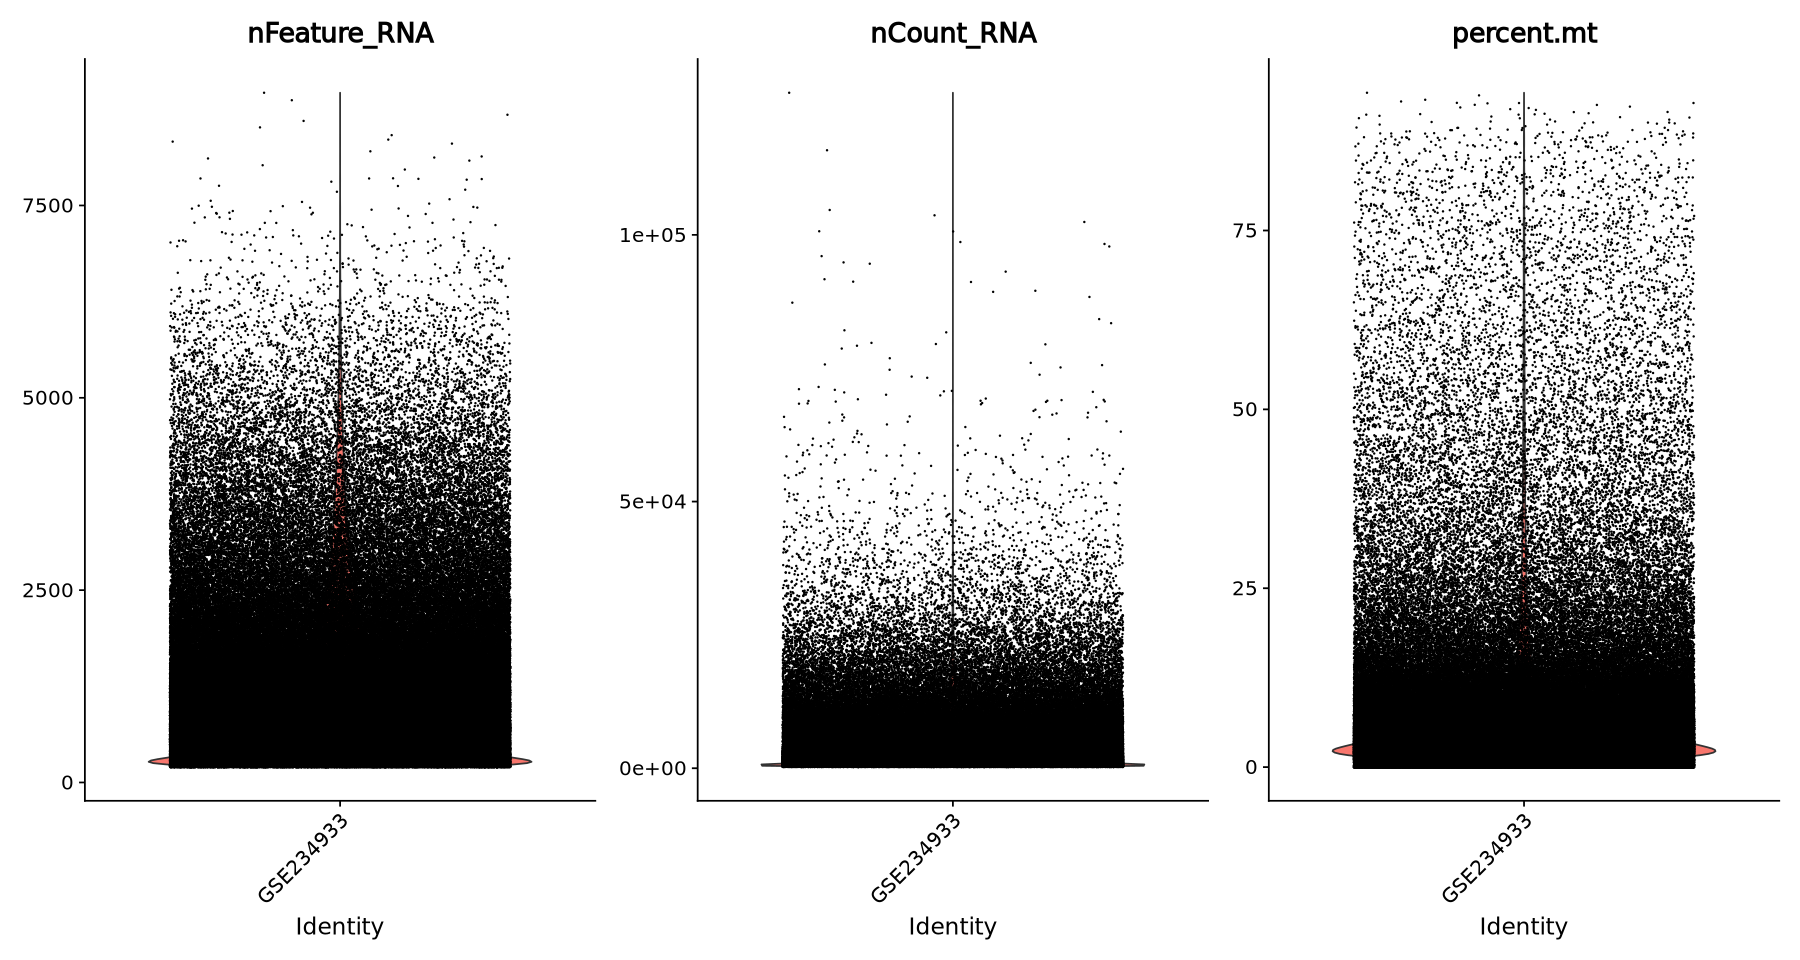

In [66]:
#QC Steps 
HNSCC[["percent.mt"]] <- PercentageFeatureSet(HNSCC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(HNSCC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [67]:
#Normalise the data
HNSCC <- NormalizeData(HNSCC)
#Find variable features
HNSCC <- FindVariableFeatures(HNSCC, selection.method = "vst", nfeatures = 2000)
#Scale the data
HNSCC <- ScaleData(HNSCC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run PCA
HNSCC <- RunPCA(HNSCC, features = VariableFeatures(object = HNSCC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16

Normalizing layer: counts.17

Normalizing layer: counts.18

Normalizing layer: counts.19

Normalizing layer: counts.20

Normalizing layer: counts.21

Normalizing layer: counts.22

Normalizing layer: counts.23

Normalizing layer: counts.24

Normalizing layer: counts.25

Normalizing layer: counts.26

Normalizing layer: counts.27

Normalizing layer: counts.28

Normalizing layer: counts.29

Normalizing layer: counts.30

Normalizing layer: counts.31

Normalizing layer: counts.32

Normalizing layer: counts.33

Normalizing layer: 

In [68]:
#Note: above code takes ~24min

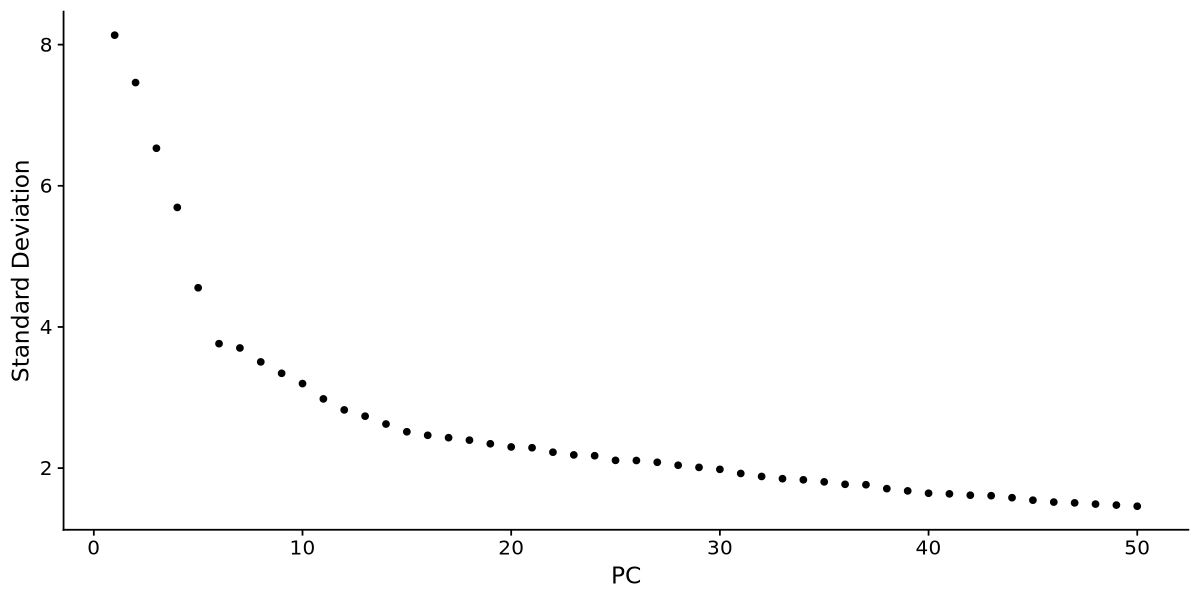

In [69]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(HNSCC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [70]:
#Find neighbours (make sure number matches no. features chosen above)
HNSCC <- FindNeighbors(HNSCC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [71]:
#Run UMAP
HNSCC <- RunUMAP(HNSCC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:23:08 UMAP embedding parameters a = 0.9922 b = 1.112

10:23:08 Read 330385 rows and found 40 numeric columns

10:23:08 Using Annoy for neighbor search, n_neighbors = 30

10:23:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:23:41 Writing NN index file to temp file /scratch/temp/9569120/RtmpRchk9v/file822bc2ceec24a

10:23:41 Searching Annoy index using 1 thread, search_k = 3000

10:25:54 Annoy recall = 100%

10:25:56 Commencing smooth kNN distance calibration using 1 thread
 with 

In [72]:
#Cluster, resolution here set to 0.2
HNSCC <- FindClusters(HNSCC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 330385
Number of edges: 10950325

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9692
Number of communities: 39
Elapsed time: 185 seconds


14 singletons identified. 25 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



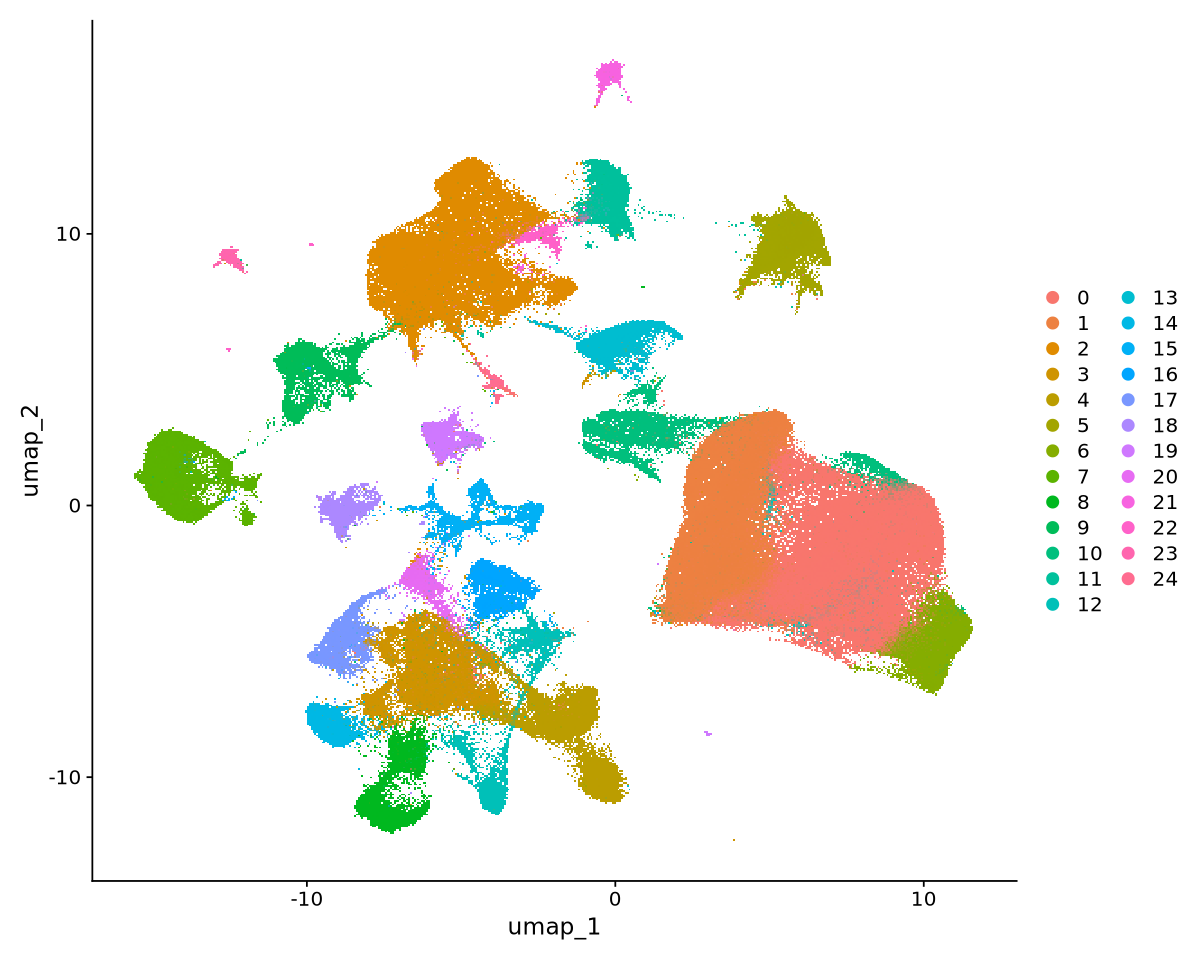

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



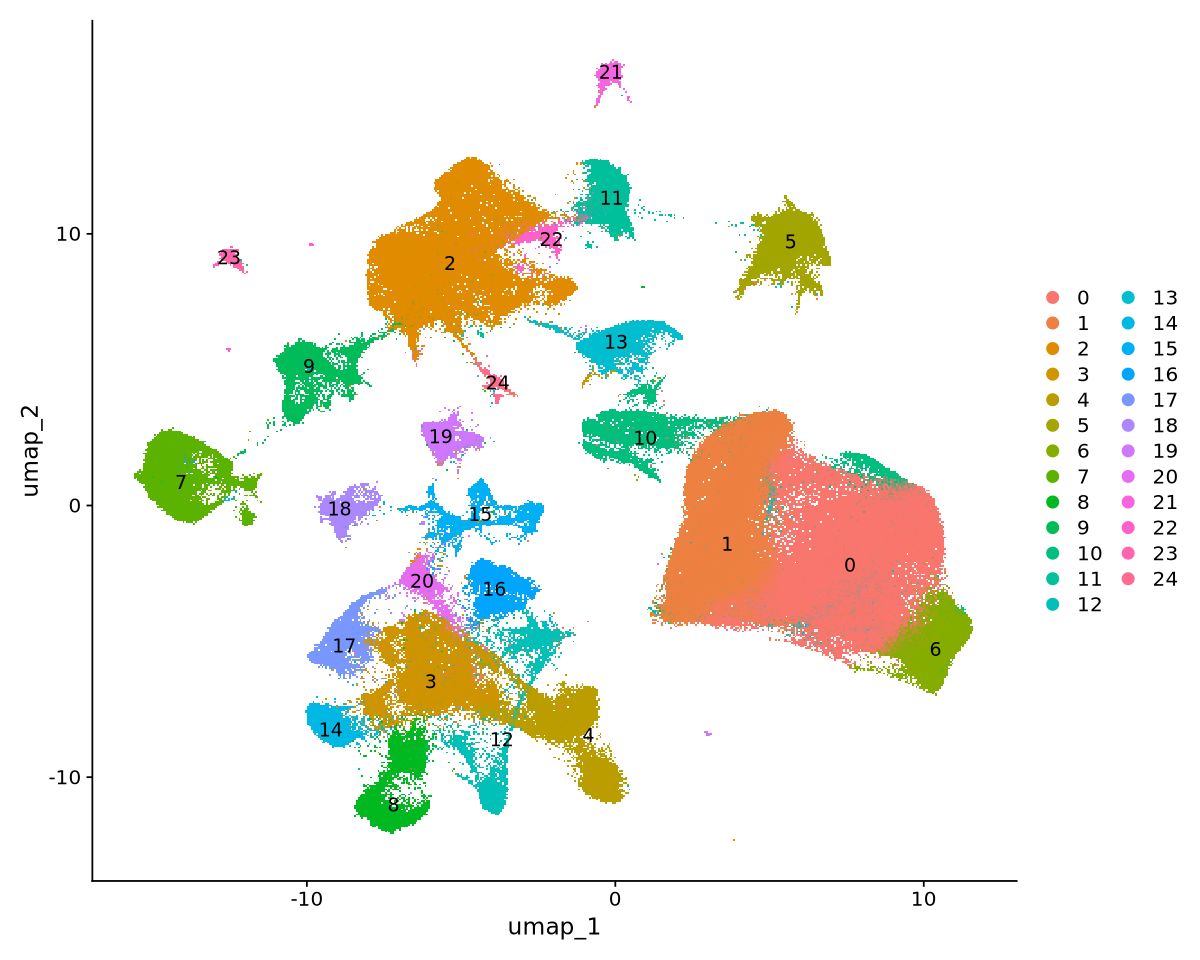

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



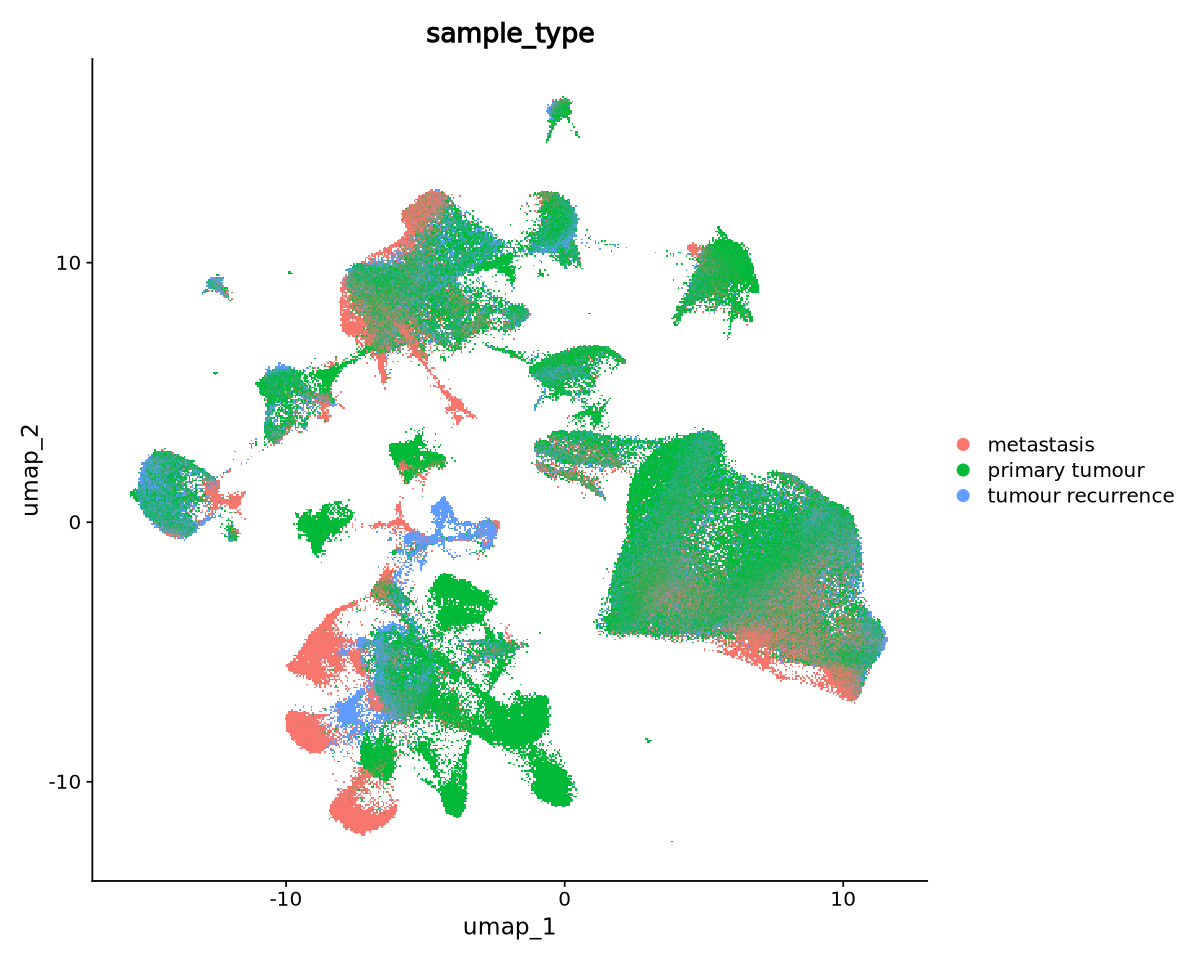

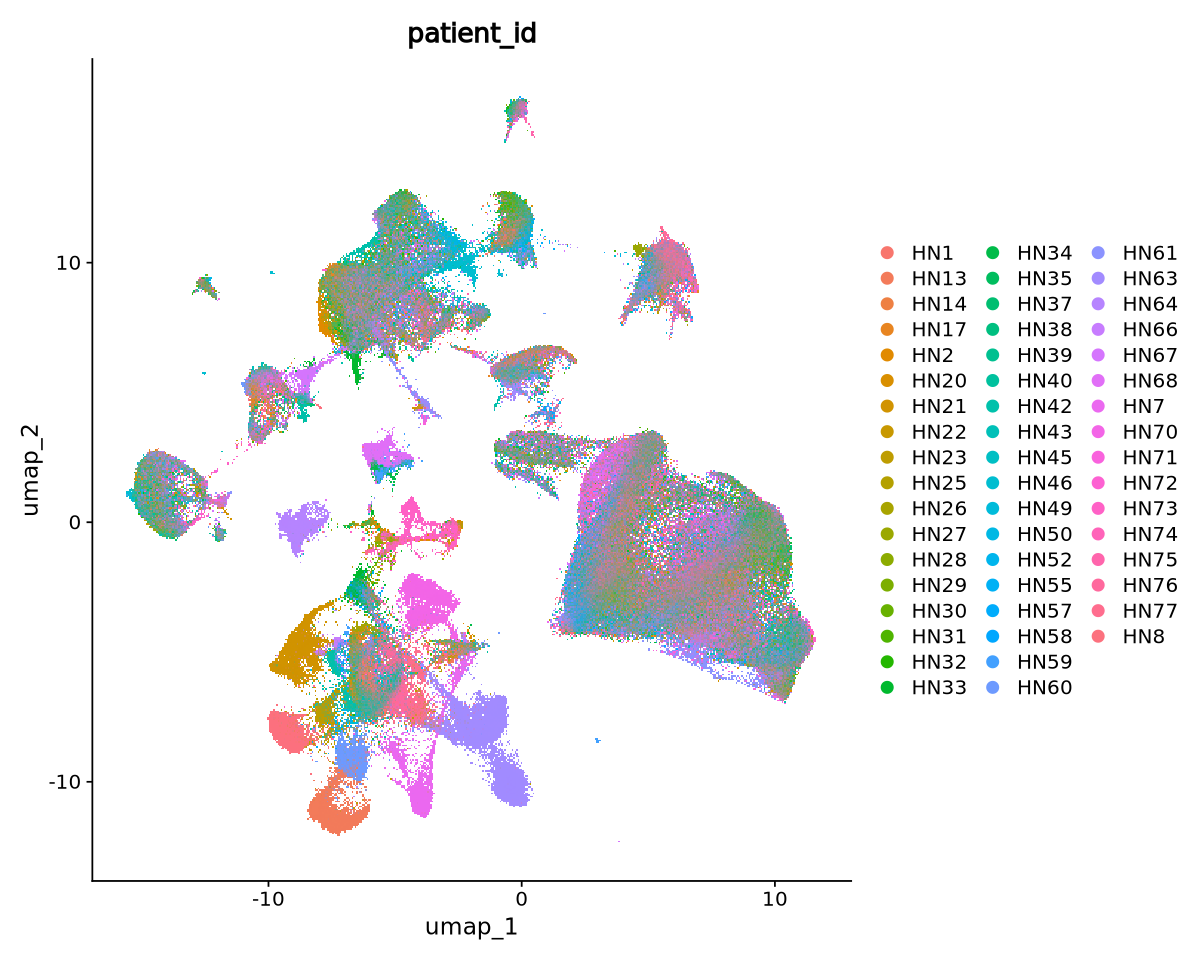

In [75]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(HNSCC, reduction = "umap")
DimPlot(HNSCC, reduction = "umap", label=TRUE)
DimPlot(HNSCC, reduction = "umap", group = "sample_type")
DimPlot(HNSCC, reduction = "umap", group = "patient_id")

In [76]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(HNSCC, file = "/scratch/user/s4436039/scdata/GSE234933/GSE234933.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

In [3]:
HNSCC <- readRDS("GSE234933.RDS")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

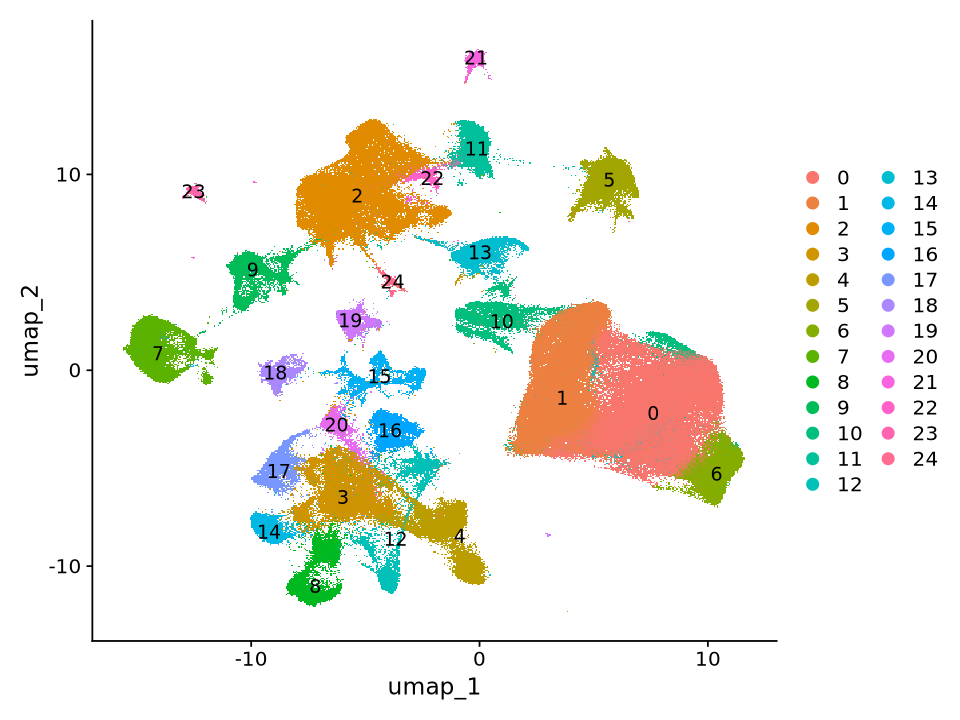

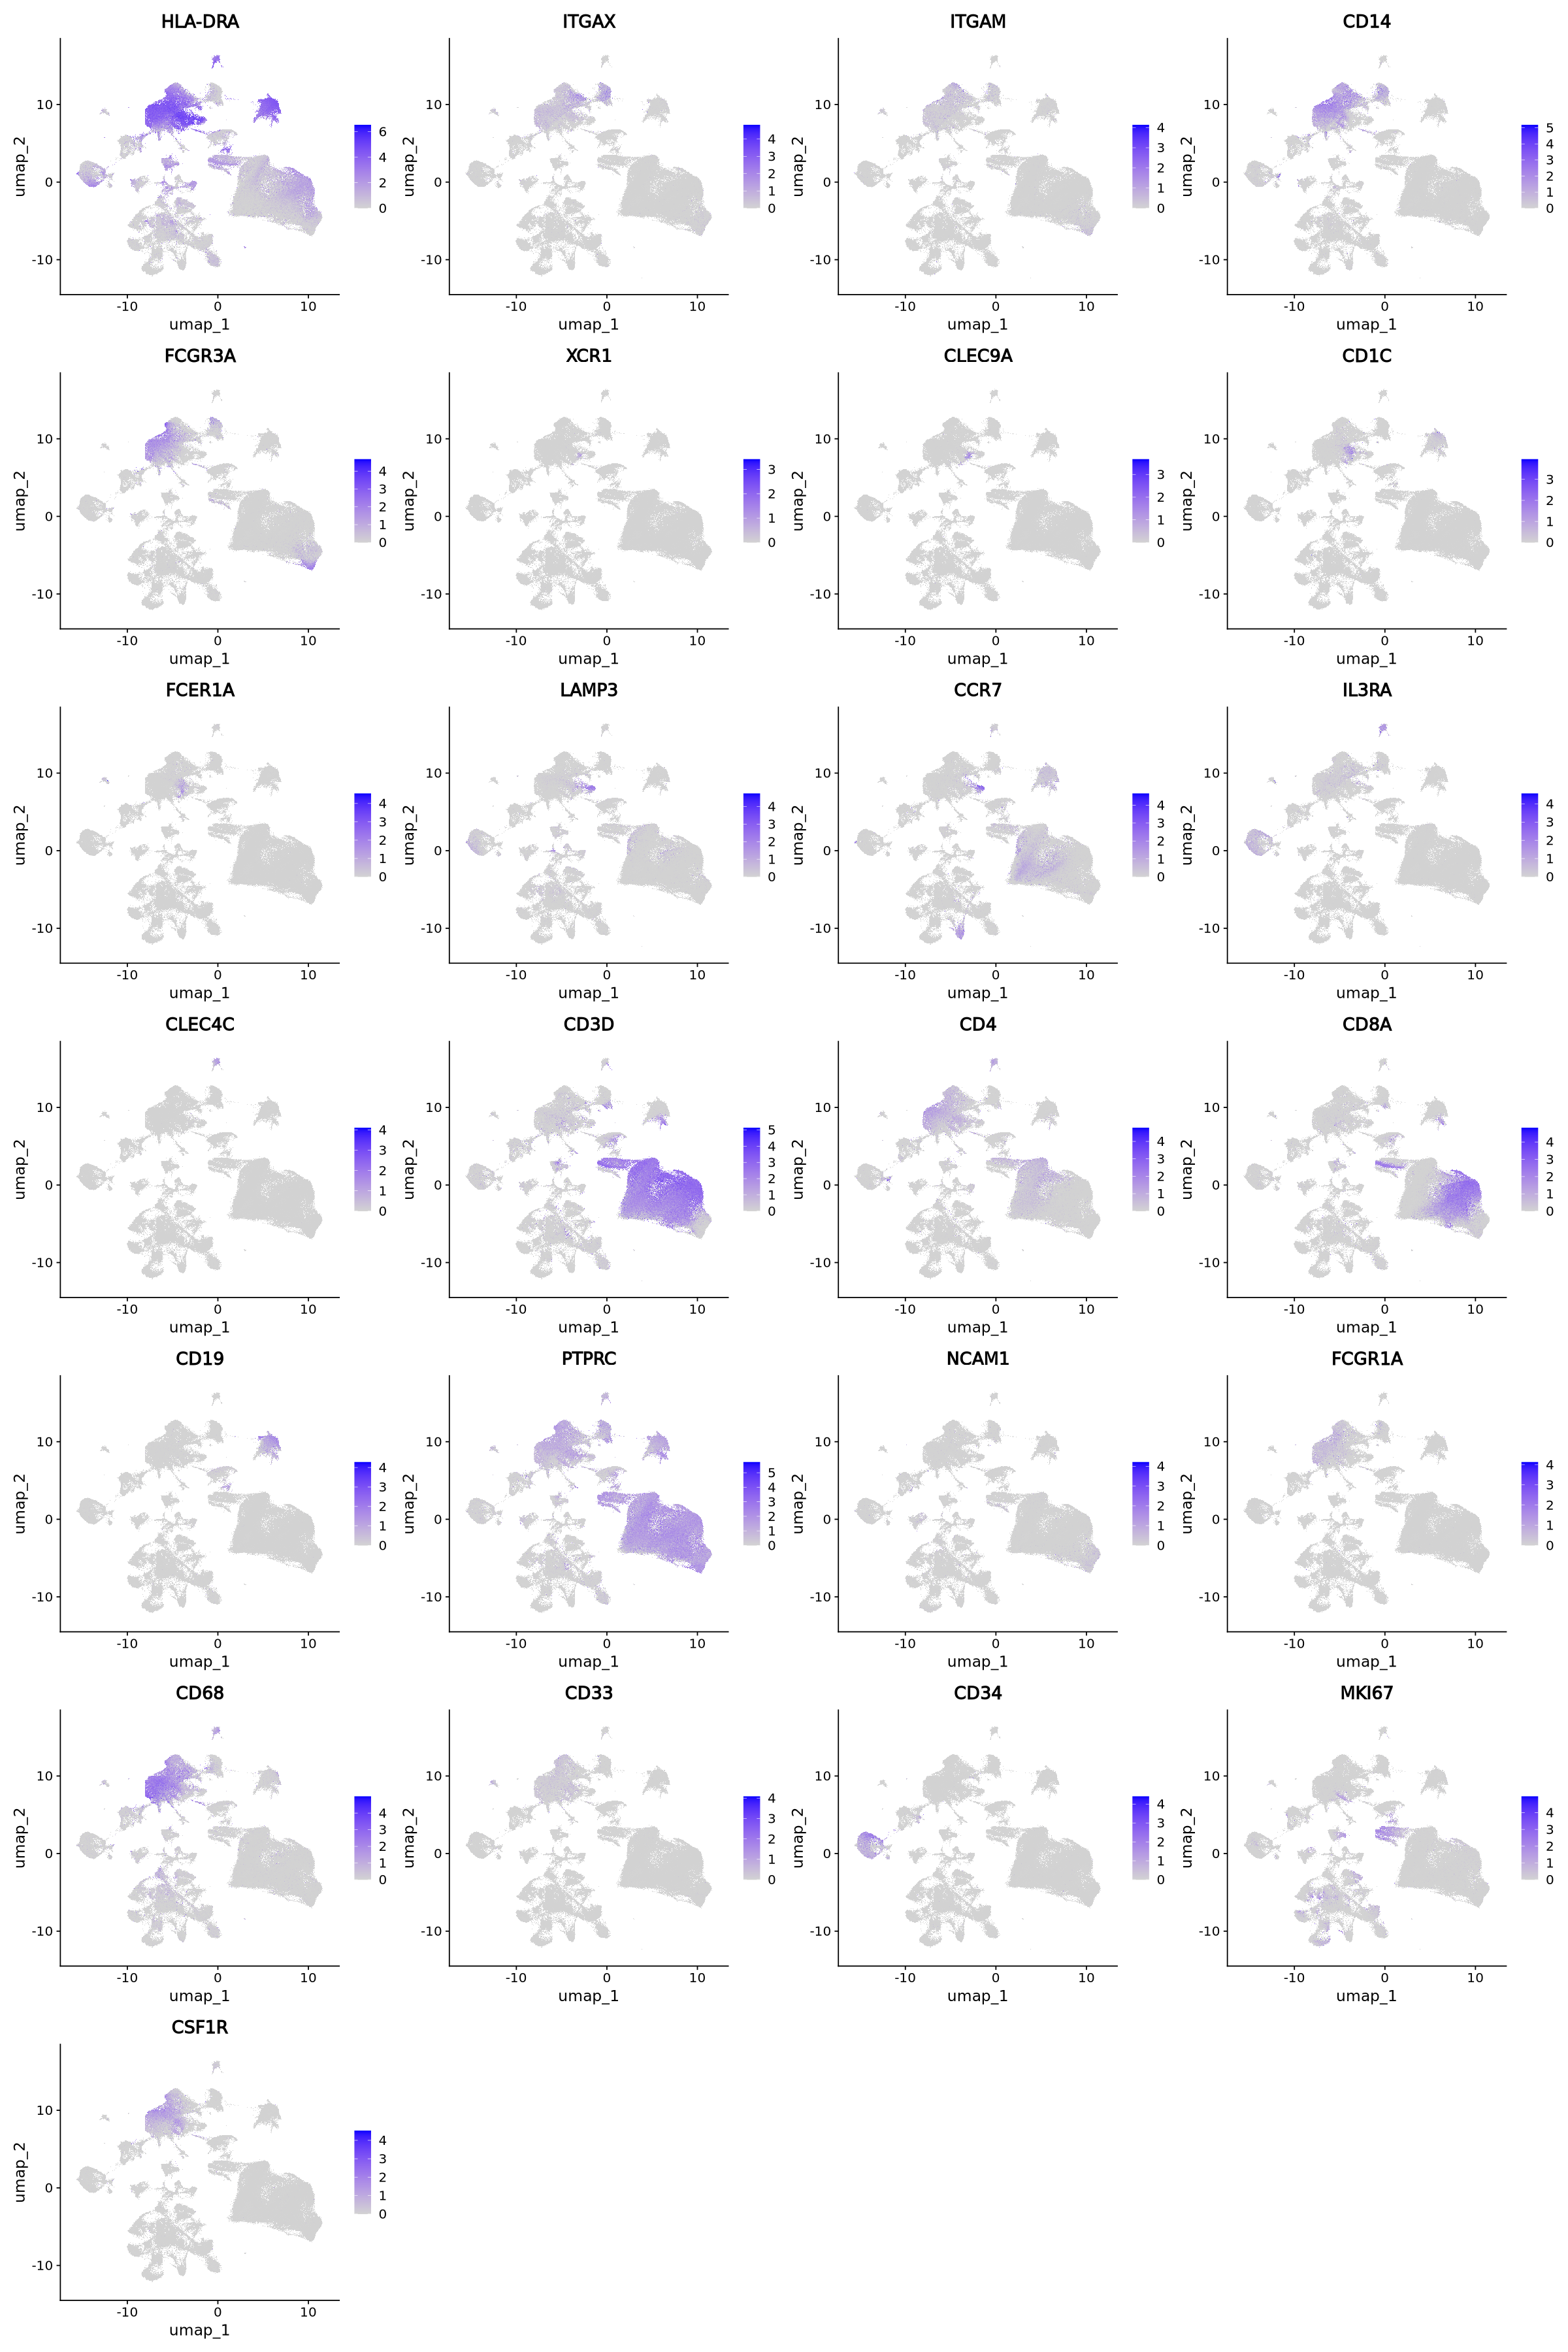

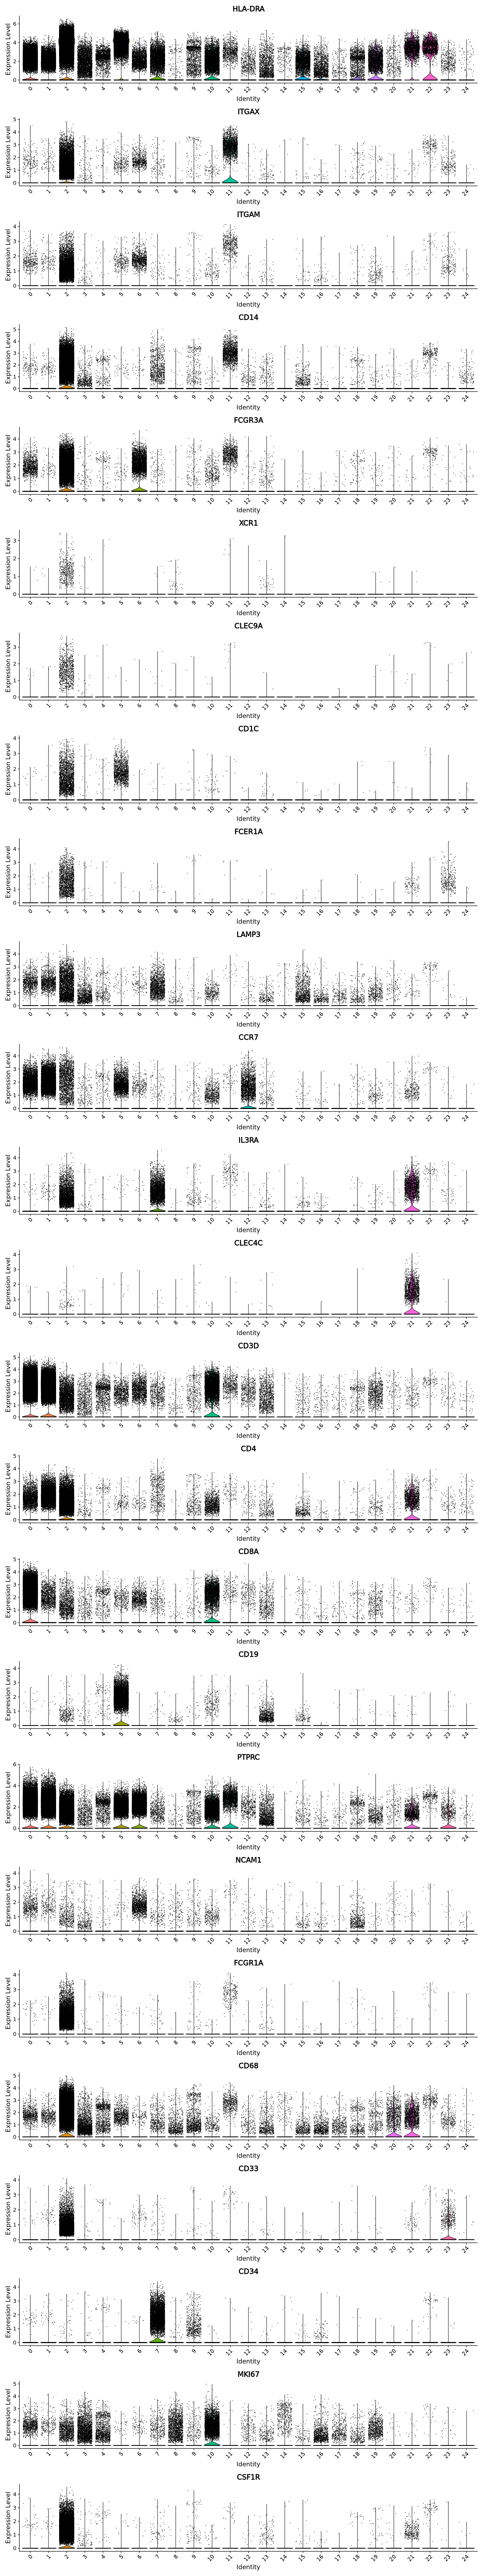

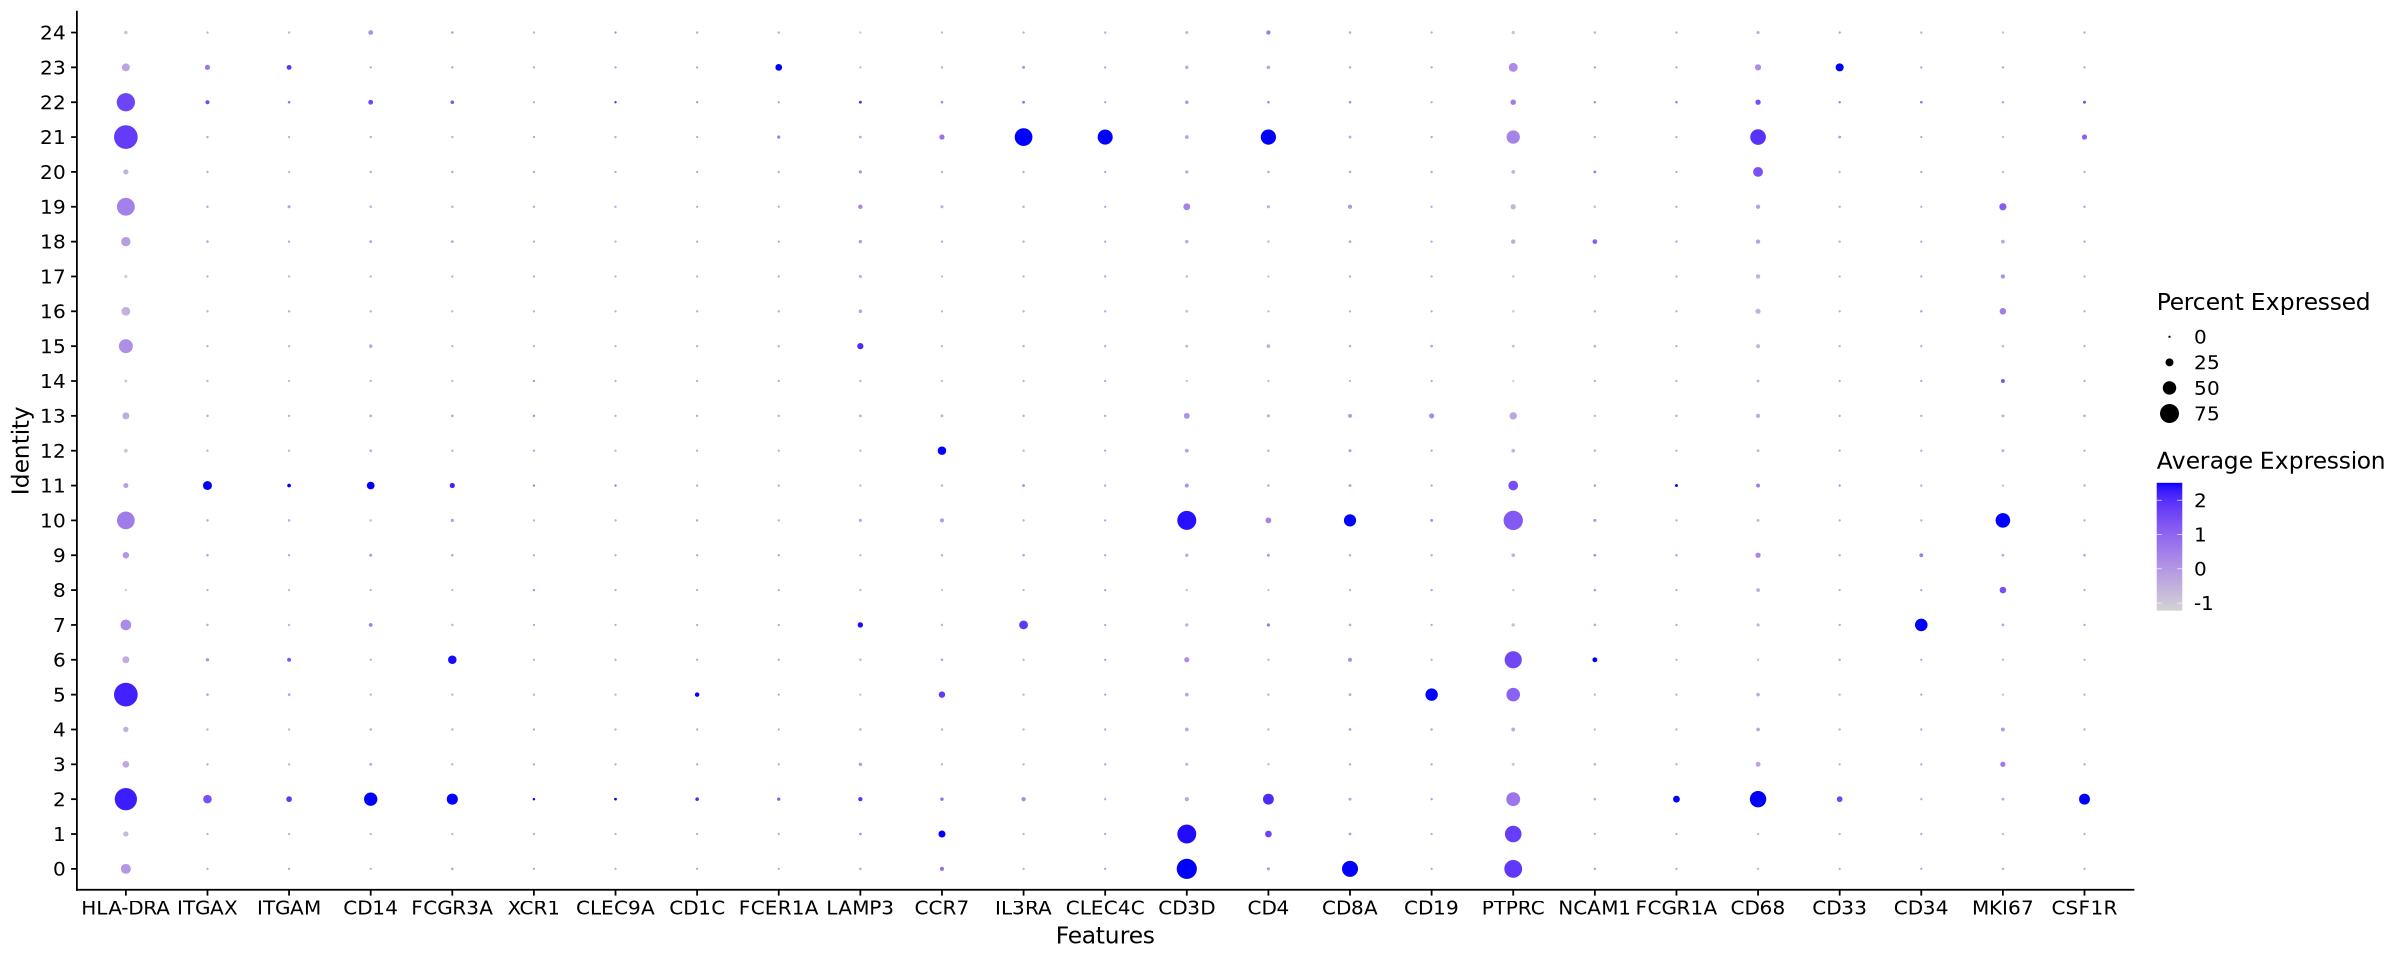

In [4]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(HNSCC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 2 are the myeloid cells, cluster 22 is questionable but may contain some myeloid cells as well so including that too, now subsetting out these clusters

In [8]:
head(HNSCC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE234933_HNSCC_tu_HN1_AAACCTGAGTATTGGA-1 GSE234933   948        574        
GSE234933_HNSCC_tu_HN1_AAACCTGAGTTGCAGG-1 GSE234933  6745        257        
GSE234933_HNSCC_tu_HN1_AAACCTGCAATAGCAA-1 GSE234933   677        320        
GSE234933_HNSCC_tu_HN1_AAACCTGCATTTCACT-1 GSE234933  4541       1130        
GSE234933_HNSCC_tu_HN1_AAACCTGTCGGCGGTT-1 GSE234933   909        444        
GSE234933_HNSCC_tu_HN1_AAACCTGTCTCGTTTA-1 GSE234933   634        353        
                                          sample_type    cancer_type patient_id
GSE234933_HNSCC_tu_HN1_AAACCTGAGTATTGGA-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGAGTTGCAGG-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGCAATAGCAA-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGCATTTCACT-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGTCGGCGGTT-1 primary tumour HNSCC       HN1       
GSE234933_HNSCC_tu_HN1_AAACCTGTCTCGTTTA-1 primary tumour HNSCC       HN1       
                                          sample_id              percent.mt
GSE234933_HNSCC_tu_HN1_AAACCTGAGTATTGGA-1 GSE234933_HNSCC_tu_HN1  1.898734 
GSE234933_HNSCC_tu_HN1_AAACCTGAGTTGCAGG-1 GSE234933_HNSCC_tu_HN1 87.931801 
GSE234933_HNSCC_tu_HN1_AAACCTGCAATAGCAA-1 GSE234933_HNSCC_tu_HN1 29.837518 
GSE234933_HNSCC_tu_HN1_AAACCTGCATTTCACT-1 GSE234933_HNSCC_tu_HN1  5.637525 
GSE234933_HNSCC_tu_HN1_AAACCTGTCGGCGGTT-1 GSE234933_HNSCC_tu_HN1  0.770077 
GSE234933_HNSCC_tu_HN1_AAACCTGTCTCGTTTA-1 GSE234933_HNSCC_tu_HN1  3.785489 
                                          RNA_snn_res.0.2 seurat_clusters
GSE234933_HNSCC_tu_HN1_AAACCTGAGTATTGGA-1 3               3              
GSE234933_HNSCC_tu_HN1_AAACCTGAGTTGCAGG-1 12              12             
GSE234933_HNSCC_tu_HN1_AAACCTGCAATAGCAA-1 12              12             
GSE234933_HNSCC_tu_HN1_AAACCTGCATTTCACT-1 1               1              
GSE234933_HNSCC_tu_HN1_AAACCTGTCGGCGGTT-1 2               2              
GSE234933_HNSCC_tu_HN1_AAACCTGTCTCGTTTA-1 3               3

In [9]:
myeloid_HNSCC <- subset(HNSCC, subset = RNA_snn_res.0.2 %in% c("2","22"))

In [7]:
HNSCC
myeloid_HNSCC

An object of class Seurat 
33514 features across 330385 samples within 1 assay 
Active assay: RNA (33514 features, 2000 variable features)
 105 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34, counts.35, counts.36, counts.37, counts.38, counts.39, counts.40, counts.41, counts.42, counts.43, counts.44, counts.45, counts.46, counts.47, counts.48, counts.49, counts.50, counts.51, counts.52, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, data.27, data.28, data.29, data.30, data.31, data.32

An object of class Seurat 
33514 features across 40487 samples within 1 assay 
Active assay: RNA (33514 features, 2000 variable features)
 105 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34, counts.35, counts.36, counts.37, counts.38, counts.39, counts.40, counts.41, counts.42, counts.43, counts.44, counts.45, counts.46, counts.47, counts.48, counts.49, counts.50, counts.51, counts.52, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, data.27, data.28, data.29, data.30, data.31, data.32,

In [12]:
saveRDS(myeloid_HNSCC, "/scratch/user/s4436039/scdata/GSE234933/GSE234933_myeloid.RDS")

#### Following the above then need to move entire GSE234933 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE234933/ /QRISdata/Q5935/nikita/scdata/GSE234933
```